## Test 1 - Applied stream

The data science department at Walmart often posts problems on the data science challenge website, [kaggle](www.kaggle.com). In this test, we will download some of their data, and use our current understanding of Python to do some exploratory data analysis.

The challenge this data comes from was to revise the method they use to classify trip types. The have a number of categories which shopping trips are clustered into, and challenged entrants to recapitulate their clustering. The challenge is [archived here](https://www.kaggle.com/c/walmart-recruiting-trip-type-classification/). The training data set contains the TripType, as well as VisitNumber, day of the week, Upc of product purchased, the scancount, department, and fineline number (a categorical description of the item). Each VisitNumber is a unique basket, with a line for each item scanned. I am providing you with the first 50,000 lines of data, from the 650,000 total.

The Desired clustering is the categorical variable TripType.

You can complete this course without any knowledge of Pandas and Numpy - I am loading the data in like this, as it is the easiest way (by far). Please leave the code blocks in the Data Import section untouched - run them as needed. Feel free to download the csv from the website and check it out, but use Python for the analysis!

### Data Import

Here I'm loading the data from the course website, showing the first 5 lines, and putting it into a dictionary, where each VisitNumber has its own entry.

The dict is called groups.

Please run the below (cursor in cell, then `ctrl-enter`, or click run cell.

In [1]:
import pandas as pd
from pandas import DataFrame, Series

In [2]:
dat = pd.read_csv("http://jeremy.kiwi.nz/pythoncourse/assets/tests/r&d/test1data.csv")

In [3]:
dat.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [4]:
#convert DataFrame to dict
groups = dict(list(dat.groupby("VisitNumber")))
#convert dataframe rows to lists in dict
groups = {key: val.values.tolist() for key,val in groups.items()}

### Data Checking

Please run the below cell, you should get:

`
[[999, 5, 'Friday', 68113152929.0, -1, 'FINANCIAL SERVICES', 1000.0]]
[[30, 7, 'Friday', 60538815980.0, 1, 'SHOES', 8931.0], [30, 7, 'Friday', 7410811099.0, 1, 'PERSONAL CARE', 4504.0]]
`

If not, please redownload the notebook from the website.

In [5]:
print(groups[5])
print(groups[7])

[[999, 5, 'Friday', 68113152929.0, -1, 'FINANCIAL SERVICES', 1000.0]]
[[30, 7, 'Friday', 60538815980.0, 1, 'SHOES', 8931.0], [30, 7, 'Friday', 7410811099.0, 1, 'PERSONAL CARE', 4504.0]]


### Test

Please fill the below questions in the cells and run them for output.

If you'd like another cell, use `alt-enter` or the insert menu.

If you'd like to enter text to explain, either use # for comments, or add a new cell, then use the dropdown box above to convert it to markdown (from code).

Some data is missing or non-numeric, remember to check and remove or fix these data points!

Don't worry about printing the outputs - assign them to a variable so I check them

1\. Create a new dict, which contains the same keys, but a list of unique DepartmentDescription of items for each visit: ie {7:['SHOES', 'PERSONAL CARE']}

In [6]:
uniq_desc_by_vistnum = dict(dat.groupby('VisitNumber')['DepartmentDescription'].apply(lambda x:x.unique().tolist()))
# show 4 examples
{x:y for x,y in uniq_desc_by_vistnum.items() if x in [5,7,8,9]}

{5: ['FINANCIAL SERVICES'],
 7: ['SHOES', 'PERSONAL CARE'],
 8: ['PAINT AND ACCESSORIES',
  'DSD GROCERY',
  'MEAT - FRESH & FROZEN',
  'DAIRY',
  'PETS AND SUPPLIES',
  'HOUSEHOLD CHEMICALS/SUPP',
  nan],
 9: ['IMPULSE MERCHANDISE', 'PRODUCE']}

2\. If you used a function to do this, use a comprehension, if you used a comprehension, use a function

In [7]:
groups1 = dict(list(dat.groupby("VisitNumber")))
groups1 = {key: val.DepartmentDescription.unique().tolist() for key,val in groups1.items()}
# show 4 examples
{x:y for x,y in groups1.items() if x in [5,7,8,9]}

{5: ['FINANCIAL SERVICES'],
 7: ['SHOES', 'PERSONAL CARE'],
 8: ['PAINT AND ACCESSORIES',
  'DSD GROCERY',
  'MEAT - FRESH & FROZEN',
  'DAIRY',
  'PETS AND SUPPLIES',
  'HOUSEHOLD CHEMICALS/SUPP',
  nan],
 9: ['IMPULSE MERCHANDISE', 'PRODUCE']}

3\. Create a new dict, with the total number of each category each customer bought. It should look like `{7:[['SHOES',1], ['PERSONAL CARE',1]], ....}`

In [8]:
dat1 = dat[dat.DepartmentDescription.notna()]
grp = dat1.groupby(['VisitNumber','DepartmentDescription'])['ScanCount'].apply(sum).reset_index()

def f(x):
    a = []
    for index,row in x.iterrows():
        a.append([row['DepartmentDescription'], row['ScanCount']])
    return(a)

newdict = grp.groupby('VisitNumber').apply(lambda x: f(x)).to_dict()

# show 4 examples
{x:y for x,y in newdict.items() if x in [5,7,8,9]}

{5: [['FINANCIAL SERVICES', -1]],
 7: [['PERSONAL CARE', 1], ['SHOES', 1]],
 8: [['DAIRY', 2],
  ['DSD GROCERY', 1],
  ['HOUSEHOLD CHEMICALS/SUPP', 1],
  ['MEAT - FRESH & FROZEN', 1],
  ['PAINT AND ACCESSORIES', 18],
  ['PETS AND SUPPLIES', 4]],
 9: [['IMPULSE MERCHANDISE', 1], ['PRODUCE', 2]]}

4\. Create a new dict, which contains each customer as a key, with a list of day shopped, TripType, and summed ScanCount (total items bought).

In [9]:
dat2 = dat.groupby(['VisitNumber','Weekday','TripType'])['ScanCount'].apply(sum).reset_index()
a=dat2.groupby('VisitNumber').apply(lambda x: [x.Weekday.values[0],x.TripType.values[0],x.ScanCount.values[0]]).to_dict()

# show 4 examples
{x:y for x,y in a.items() if x in [5,7,8,9]}

{5: ['Friday', 999, -1],
 7: ['Friday', 30, 2],
 8: ['Friday', 26, 28],
 9: ['Friday', 8, 3]}

5\. Create a Visit Class, which contains the total data we have about each visit, with the minimum amount of repetition.

In [10]:
dat.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [11]:
class Visit:
    def __init__(self,vals):
        self.triptype = vals[0][0]
        self.visitnumber = vals[0][1]
        self.weekday = vals[0][2]
        self.upc = [i[3] for i in vals]
        self.ScanCount = [i[4] for i in vals]
        self.DepartmentDescription = [i[5] for i in vals]
        self.FinelineNumber = [i[6] for i in vals]

7\. Turn the current dict into a dict of {VisitNumber : Vist} using the new class.

In [12]:
dict_visit ={}
for i,vals in groups.items():
    dict_visit[i] = Visit(vals)

8\. Create an overall tally of the different TripTypes - Which was the most common TripType? The least common?

In [13]:
dat.groupby(['TripType'])['VisitNumber'].nunique().reset_index().sort_values('VisitNumber').head()

,TripType,VisitNumber
7,14,2
14,23,13
10,19,35
17,26,38
12,21,40


9\. Optional, open ended question - Can you get an idea how the TripType categories are determined? Hint, tally TripTypes against categories, fineline categories, day of the week, number of items.

Include your code, and a quick description. They used a machine learning algorithm, so don't worry about complete accuracy, a qualatative explanation is perfect.

In [14]:
dat.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

## Ratio of (# negative scan)/(# positive scan + # negative scan)
999: visits with returning 

In [16]:
dat_pos = dat[dat.ScanCount>0].groupby(['TripType','VisitNumber'])['ScanCount'].sum().reset_index()
dat_neg = dat[dat.ScanCount<0].groupby(['TripType','VisitNumber'])['ScanCount'].sum().reset_index()

dat_pos = dat_pos.rename({'ScanCount':'posCnt'},axis=1)
dat_neg = dat_neg.rename({'ScanCount':'negCnt'},axis=1)
dat_neg['negCnt'] = - dat_neg['negCnt']

dat_merge = dat_pos.merge(dat_neg,how='outer')
dat_merge[['posCnt','negCnt']] = dat_merge.loc[:,['posCnt','negCnt']].fillna(0)

dat_merge['ratio'] = dat_merge['negCnt']/(dat_merge['negCnt']+dat_merge['posCnt'])

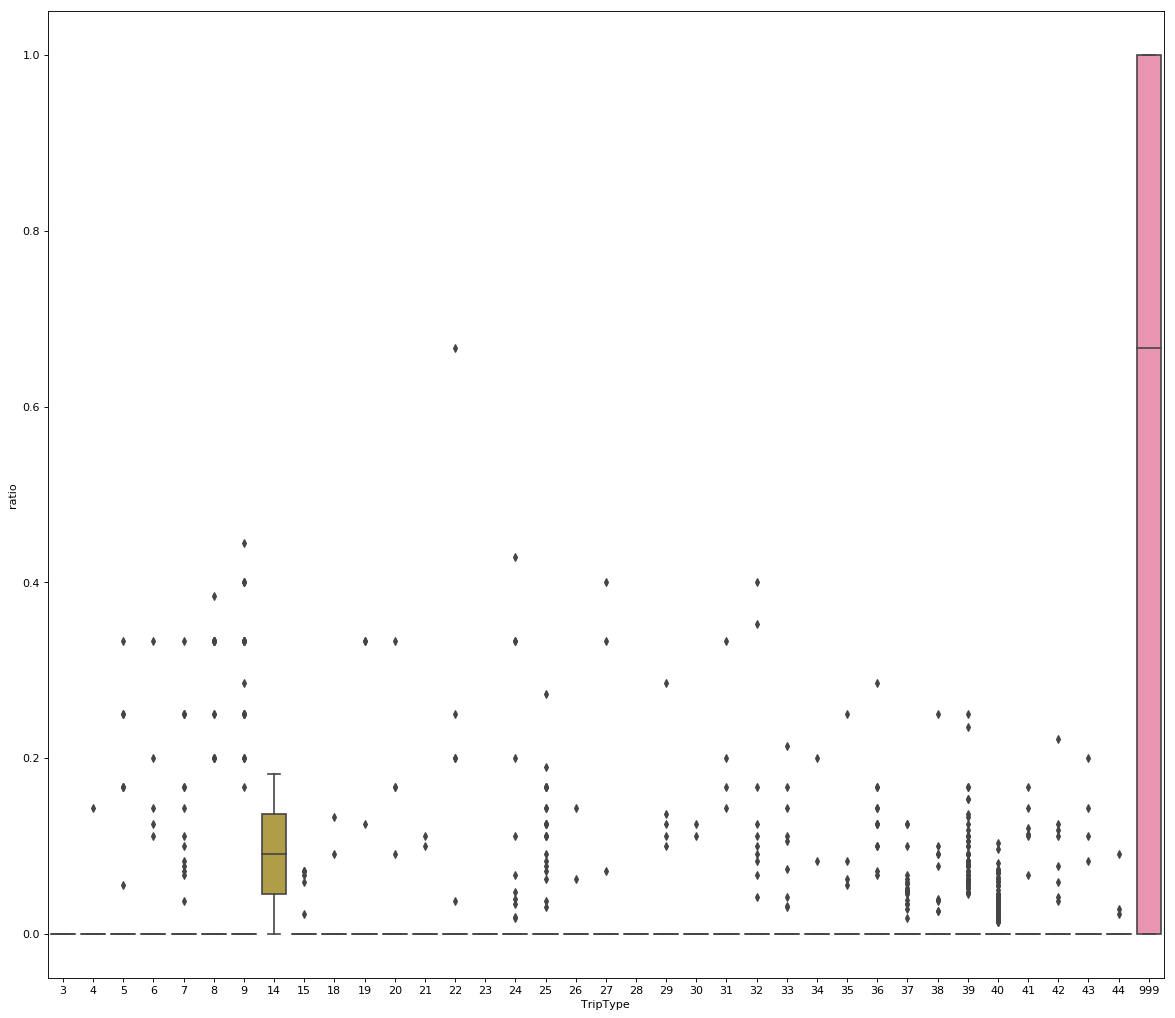

In [17]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.boxplot(x='TripType',y='ratio',data=dat_merge)

## Number of departments visited 
37-44: more departments visited

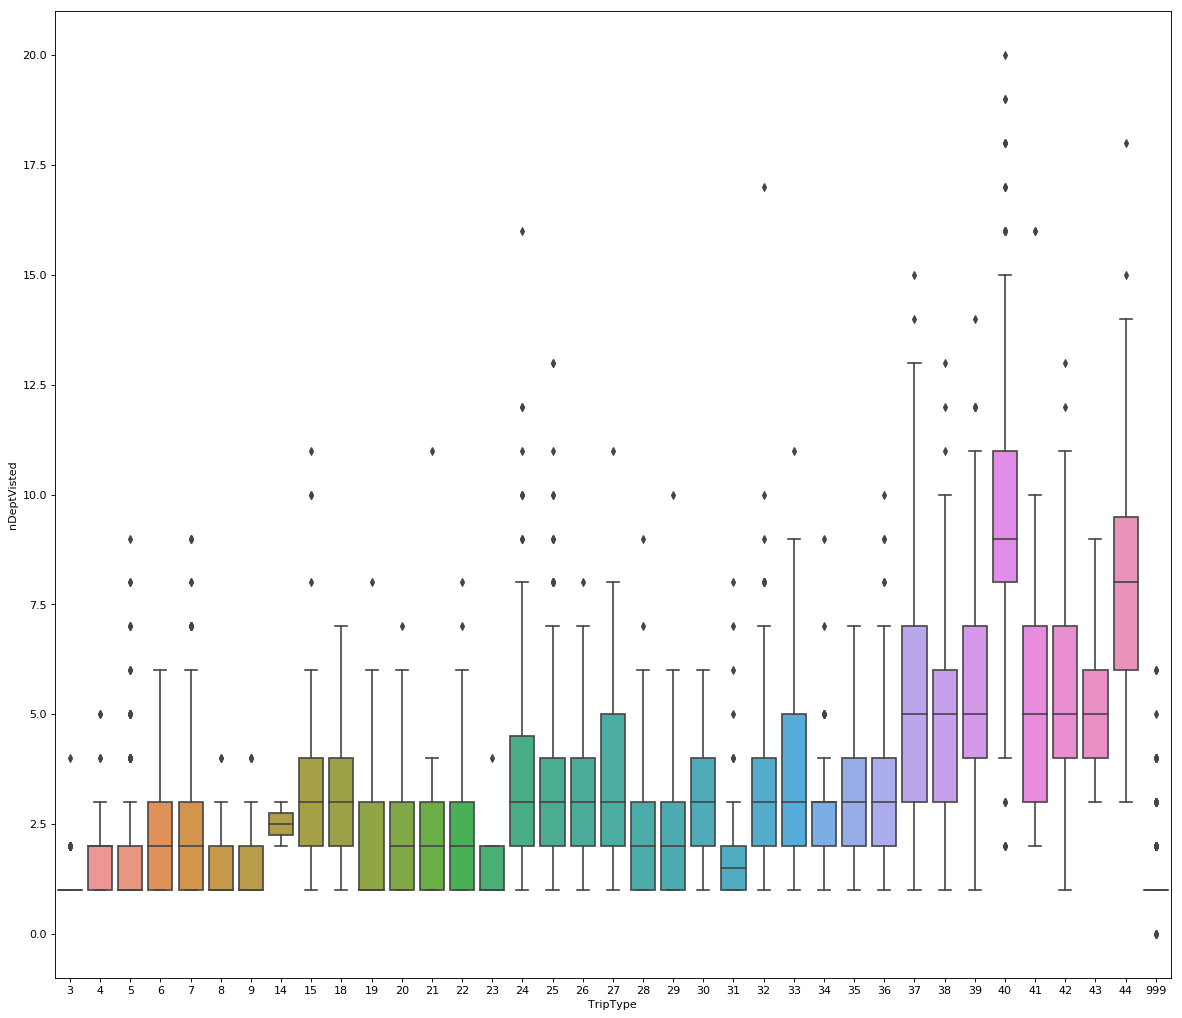

In [18]:
dat2 = dat[dat.ScanCount>0].groupby(['TripType','VisitNumber'])['DepartmentDescription'].nunique().reset_index()
dat2 = dat2.rename({'DepartmentDescription':'nDeptVisted'},axis=1)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
sns.boxplot(x='TripType',y='nDeptVisted',data=dat2)

## Basket size


   TripType  VisitNumber  ScanCount
0         3          106          2
1         3          121          2
2         3          153          2
3         3          162          2
4         3          164          2


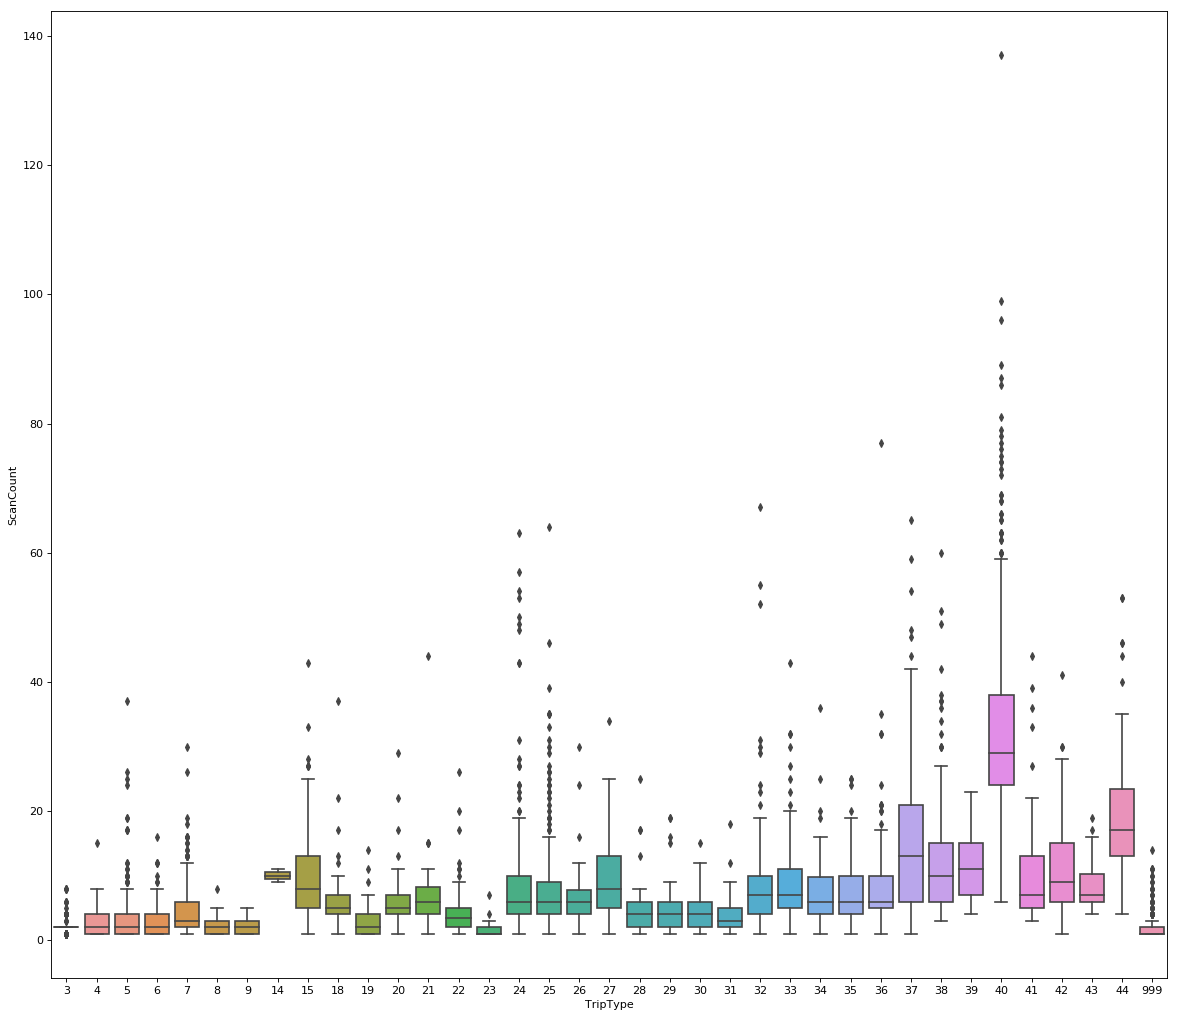

In [19]:
# 40 and 44: visits with high scancount
# 999: visits of returning
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
# TripType 999 is return 
dat2 = dat[dat.ScanCount>0].groupby(['TripType','VisitNumber'])['ScanCount'].sum().reset_index()
print(dat2.head())
sns.boxplot(x='TripType',y='ScanCount',data=dat2)

## Distribution by triptype for each weekdays

Weekday     Friday  Saturday    Sunday
TripType                              
3         0.065574  0.045943  0.021352
4         0.006620  0.005072  0.005931
5         0.052648  0.051014  0.046263
6         0.014187  0.017303  0.010676
7         0.058323  0.052506  0.069988


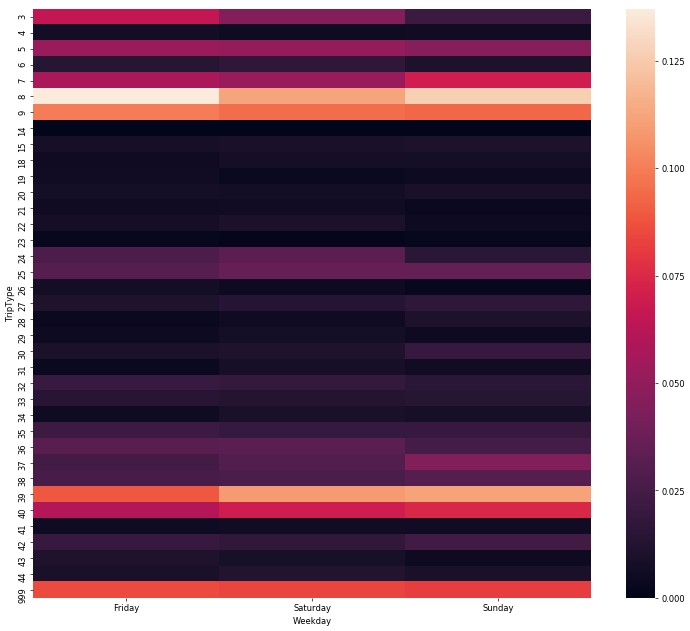

In [20]:
dat2 = dat.groupby(['TripType','Weekday'])['VisitNumber'].nunique().reset_index().sort_values('VisitNumber')
x=pd.crosstab(dat2.TripType,dat2.Weekday,values=dat2.VisitNumber,aggfunc=sum,normalize = 1)
print(x.head())
fig=plt.figure(figsize=(15,13), dpi= 60, facecolor='w', edgecolor='k')
sns.heatmap(x)